In [79]:
import itertools

import numpy as np
from qutip import *
# some_file.py
# import sys
from qudit import *
# import scipy
import time
import IPython.display as disp
from tqdm.notebook import tqdm
import multiprocess as mp
import matplotlib.pyplot as plt
from continuous import *
from discrete_simulation import *
from dataclasses import dataclass
import dill
from datetime import date
import matplotlib as mpl

# sys.path.insert(1, 'C:\\Users\\shoha\\Documents\\GitHub\\grimsmo-paper-simulations')

# from measurements import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## parameters

In [3]:
@dataclass
class ContSimResults:
    N: int
    d: int
    m_i: int
    m_c: int
    alpha: float
    simulationObject: ContinuousSimulation
    fid_prob_list: list
    gamma_list: list

    def get_fid_array(self):
        return [tup[0] for tup in self.fid_prob_list]
    
    def get_prob_array(self):
        return [tup[1] for tup in fid_prob_list]



In [4]:
d = 16
m_i = 8
fidelity_cut = 0
gamma_list = np.logspace(-3,-1,15)
gamma_ratio = 1
alpha=7

## First Discrete part

In [14]:
m_c = 4

process_count = 20  # mp.cpu_count()-9

simulation16 = DiscreteSimulation(d, m_i,m_c, alpha=alpha )

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(simulation16.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list164 = [tup[0] for tup in fid_prob_list]
prob_list164 = [tup[1] for tup in fid_prob_list]

m_c = 8

process_count = 20  # mp.cpu_count()-9

simulation16 = DiscreteSimulation(d, m_i,m_c, alpha=alpha )

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(simulation16.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list168 = [tup[0] for tup in fid_prob_list]
prob_list168 = [tup[1] for tup in fid_prob_list]

We also want to check how std change it

In [76]:
state = coherent(N,alpha)
fock_dist = np.abs(np.array(state))**2
mean_calculated = np.sum(np.arange(len(fock_dist)) * fock_dist.transpose())
std_calculated = np.sqrt(np.sum(fock_dist.transpose() * (np.arange(len(fock_dist)) - mean_calculated)**2))

m_c = 8

process_count = 20  # mp.cpu_count()-9

simulation16 = DiscreteSimulation(d, m_i,m_c, alpha=np.sqrt(alpha**2 - std_calculated) )

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(simulation16.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list168_minus = [tup[0] for tup in fid_prob_list]
prob_list168_minus = [tup[1] for tup in fid_prob_list]

simulation16 = DiscreteSimulation(d, m_i,m_c, alpha=np.sqrt(alpha**2 + std_calculated) )

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(simulation16.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list168_plus = [tup[0] for tup in fid_prob_list]
prob_list168_plus = [tup[1] for tup in fid_prob_list]


# And for squeezed

state = displace(N,alpha) * squeeze(N, squeezed) * coherent(N,0)
fock_dist = np.abs(np.array(state))**2
mean_calculated = np.sum(np.arange(len(fock_dist)) * fock_dist.transpose())
std_calculated = np.sqrt(np.sum(fock_dist.transpose() * (np.arange(len(fock_dist)) - mean_calculated)**2))

m_c = 8
process_count = 20  # mp.cpu_count()-9

simulation16 = DiscreteSimulation(d, m_i,m_c, alpha=np.sqrt(alpha**2 - std_calculated) )

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(simulation16.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list168_minus_sq = [tup[0] for tup in fid_prob_list]
prob_list168_minus_sq = [tup[1] for tup in fid_prob_list]

simulation16 = DiscreteSimulation(d, m_i,m_c, alpha=np.sqrt(alpha**2 + std_calculated) )

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(simulation16.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list168_plus_sq = [tup[0] for tup in fid_prob_list]
prob_list168_plus_sq = [tup[1] for tup in fid_prob_list]

In [106]:
state = coherent(N,alpha)
fock_dist = np.abs(np.array(state))**2
mean_calculated = np.sum(np.arange(len(fock_dist)) * fock_dist.transpose())
std_calculated = np.sqrt(np.sum(fock_dist.transpose() * (np.arange(len(fock_dist)) - mean_calculated)**2))
std_calculated

6.999999999999999

## Now continuous part

In [ ]:
m_c = 4
n = 8
N = 200

process_count = 20  # mp.cpu_count()-9

sim = ContinuousSimulation(N, d, m_i, m_c, alpha=alpha, decode_res=16)

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(sim.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))

fid_list_con4 = [tup[0] for tup in fid_prob_list]
prob_list_con4 = [tup[1] for tup in fid_prob_list]

In [ ]:
simRes4 = ContSimResults(N,d,m_i,m_c,alpha,sim, fid_prob_list, gamma_list)

import dill
from datetime import date

with open(f'results/{date.today()},simRes{m_c=},{alpha=}.pkl', 'wb') as file:
    dill.dump(simRes4, file)

In [ ]:
m_c = 8
n = 7
N = 150

process_count = 3  # mp.cpu_count()-9

sim = ContinuousSimulation(N, d, m_i, m_c, alpha=alpha, decode_res=8)

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(sim.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list_con8 = [tup[0] for tup in fid_prob_list]
prob_list_con8 = [tup[1] for tup in fid_prob_list]


simRes8 = ContSimResults(N,d,m_i,m_c,alpha,sim, fid_prob_list, gamma_list)

import dill
from datetime import date

with open(f'results/{date.today()},simRes{m_c=},{alpha=},{N=}.pkl', 'wb') as file:
    dill.dump(simRes8, file)

In [5]:
m_c = 8
n = 7
N = 200

process_count = 3  # mp.cpu_count()-9

sim = ContinuousSimulation(N, d, m_i, m_c, alpha=alpha, decode_res=8)

fid_prob_list = []

for gamma in gamma_list:
    fid_prob_list.append(sim.average_fidelity(gamma,gamma*gamma_ratio,fidelity_cut))
    print(f"{fid_prob_list=}")
fid_list_con8 = [tup[0] for tup in fid_prob_list]
prob_list_con8 = [tup[1] for tup in fid_prob_list]


simRes8 = ContSimResults(N,d,m_i,m_c,alpha,sim, fid_prob_list, gamma_list)

import dill
from datetime import date

with open(f'results/{date.today()},simRes{m_c=},{alpha=},{N=}.pkl', 'wb') as file:
    dill.dump(simRes8, file)

calculating for gamma_loss=0.001, gamma_dephasing=0.001
start, A1=0, B1=0, A2=0, B2=0
s_B=0
operator creation time: 1.6676380634307861
before rotation
matrix multiplication time: 3.210075855255127
decoding time: 3.0848402976989746
probability=(0.2210144250671182+0j)
start, A1=0, B1=0, A2=0, B2=1
s_B=0
operator creation time: 0.09718585014343262
before rotation
matrix multiplication time: 1.4973111152648926
decoding time: 2.1314613819122314
probability=(3.4669328297035596e-05+0j)
start, A1=0, B1=0, A2=0, B2=2
s_B=0
operator creation time: 0.10112905502319336
before rotation
matrix multiplication time: 1.8346869945526123
decoding time: 2.6134307384490967
probability=(0.001061307372096164+0j)
start, A1=0, B1=0, A2=0, B2=3
s_B=0
operator creation time: 0.0949854850769043
before rotation
matrix multiplication time: 2.4028725624084473
decoding time: 2.834151268005371
probability=(0.021659347004986385+0j)
start, A1=0, B1=0, A2=1, B2=0
s_B=0
operator creation time: 0.0812385082244873
before ro

In [ ]:
m_c = 8
n = 7
N = 200

process_count = 4  # mp.cpu_count()-9

def pool_helper(gamma_loss, gamma_dephasing, fidelity_cut=0, N = N, d=d, m_i=m_i, m_c=m_c, alpha=alpha):
    from discrete_simulation import ContinuousSimulation
    simpool = ContinuousSimulation(N, d, m_i, m_c, alpha=alpha, decode_res=8)
    fid_prob = simpool.average_fidelity(gamma_loss, gamma_dephasing, fidelity_cut)
    print(f"{fid_prob=}, {gamma_loss=}")
    return fid_prob

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(pool_helper, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list_con8 = [tup[0] for tup in fid_prob_list]
prob_list_con8 = [tup[1] for tup in fid_prob_list]


simobj = ContinuousSimulation(N, d, m_i, m_c, alpha=alpha, decode_res=8)
simRes8 = ContSimResults(N,d,m_i,m_c,alpha,simobj, fid_prob_list, gamma_list)

import dill
from datetime import date

with open(f'results/{date.today()},simRes{m_c=},{alpha=},{N=}.pkl', 'wb') as file:
    dill.dump(simRes8, file)

# squeezing

In [8]:
m_c = 8
n = 8
N = 200
squeezed = -0.8

process_count = 20  # mp.cpu_count()-9

sim = ContinuousSimulation(N, d, m_i, m_c, alpha=alpha, decode_res=8, squeezed = squeezed)


fid_prob_list = []
for gamma in tqdm(gamma_list):
    fid_prob_list.append(sim.average_fidelity(gamma, gamma_ratio*gamma, fidelity_cut))
    print(fid_prob_list)
fid_list_con8_sq = [tup[0] for tup in fid_prob_list]
prob_list_con8_sq = [tup[1] for tup in fid_prob_list]


simRes8sq = ContSimResults(N,d,m_i,m_c,alpha,sim, fid_prob_list, gamma_list)

import dill
from datetime import date

with open(f'results/{date.today()},simRes{m_c=},{alpha=},{squeezed=},{N=}.pkl', 'wb') as file:
    dill.dump(simRes8sq, file)

  0%|          | 0/15 [00:00<?, ?it/s]

calculating for gamma_loss=0.001, gamma_dephasing=0.001
start, A1=0, B1=0, A2=0, B2=0
s_B=0
operator creation time: 1.6557950973510742
before rotation
matrix multiplication time: 9.576498746871948
decoding time: 2.8927295207977295
probability=(0.22630775436680295+0j)
start, A1=0, B1=0, A2=0, B2=1
s_B=0
operator creation time: 0.09323334693908691
before rotation
matrix multiplication time: 3.579819679260254
decoding time: 1.9468107223510742
probability=(4.126253793060356e-05+0j)
start, A1=0, B1=0, A2=0, B2=2
s_B=0
operator creation time: 0.10395979881286621
before rotation
matrix multiplication time: 5.026139259338379
decoding time: 2.2877440452575684
probability=(0.001157310257465759+0j)
start, A1=0, B1=0, A2=0, B2=3
s_B=0
operator creation time: 0.09512495994567871
before rotation
matrix multiplication time: 7.1587090492248535
decoding time: 2.5692105293273926
probability=(0.02244741602861428+0j)
start, A1=0, B1=0, A2=1, B2=0
s_B=0
operator creation time: 0.08002471923828125
before ro

C:\Program Files\Python311\Lib\site-packages\scipy\sparse\_base.py:647: RuntimeWarning: divide by zero encountered in scalar divide
  r = self._mul_scalar(1./other)


decoding time: 1.4168970584869385
probability=0j
start, A1=1, B1=1, A2=0, B2=2
s_B=1
operator creation time: 0.08106446266174316
before rotation
matrix multiplication time: 2.996858835220337
decoding time: 1.4157280921936035
probability=(6.2777632513255436e-12+0j)
start, A1=1, B1=1, A2=0, B2=3
s_B=1
operator creation time: 0.07723546028137207
before rotation
matrix multiplication time: 4.328398704528809
decoding time: 1.4112651348114014
probability=(1.3365749388352363e-10+0j)
start, A1=1, B1=1, A2=1, B2=0
s_B=1
operator creation time: 0.08125972747802734
before rotation
matrix multiplication time: 1.6319851875305176
decoding time: 1.406022310256958
probability=0j
start, A1=1, B1=1, A2=1, B2=1
s_B=1
operator creation time: 0.07996439933776855
before rotation
matrix multiplication time: 2.9204394817352295
decoding time: 1.410125494003296
probability=(6.439712801050009e-12+0j)
start, A1=1, B1=1, A2=1, B2=2
s_B=1
operator creation time: 0.07622122764587402
before rotation
matrix multiplica

In [65]:
m_c = 8
n = 8
N = 200
squeezed = -0.8
f_cut = 0.9
d_cut= 32

process_count = 20  # mp.cpu_count()-9

sim = ContinuousSimulation(N, d_cut, m_i, m_c, alpha=alpha, decode_res=8, squeezed = squeezed)


fid_prob_list = []
for gamma in tqdm(gamma_list):
    fid_prob_list.append(sim.average_fidelity(gamma, gamma_ratio*gamma, f_cut))
    print(fid_prob_list)
fid_list_con8_sq_cut = [tup[0] for tup in fid_prob_list]
prob_list_con8_sq_cut = [tup[1] for tup in fid_prob_list]


simRes8sq = ContSimResults(N,d,m_i,m_c,alpha,sim, fid_prob_list, gamma_list)

import dill
from datetime import date

with open(f'results/{date.today()},simRes{m_c=},{alpha=},{squeezed=},{N=},{f_cut=}.pkl', 'wb') as file:
    dill.dump(simRes8sq, file)

  0%|          | 0/15 [00:00<?, ?it/s]

calculating for gamma_loss=0.001, gamma_dephasing=0.001
start, A1=0, B1=0, A2=0, B2=0
s_B=0
operator creation time: 3.2731282711029053
before rotation
matrix multiplication time: 27.860925674438477
decoding time: 3.7561745643615723
probability=(0.20941832033034233+0j)
start, A1=0, B1=0, A2=0, B2=1
s_B=0
operator creation time: 0.20247530937194824
before rotation
matrix multiplication time: 11.777132749557495
decoding time: 2.753624200820923
probability=(8.232372583994512e-05+0j)
start, A1=0, B1=0, A2=0, B2=2
s_B=0
operator creation time: 0.19436144828796387
before rotation
matrix multiplication time: 16.155027866363525
decoding time: 2.871391534805298
probability=(0.0018022368018920153+0j)
start, A1=0, B1=0, A2=0, B2=3
s_B=0
operator creation time: 0.19439005851745605
before rotation
matrix multiplication time: 21.968541622161865
decoding time: 3.1719462871551514
probability=(0.027066591848059957+0j)
start, A1=0, B1=0, A2=1, B2=0
s_B=0
operator creation time: 0.18109726905822754
before

C:\Program Files\Python311\Lib\site-packages\scipy\sparse\_base.py:647: RuntimeWarning: divide by zero encountered in scalar divide
  r = self._mul_scalar(1./other)


decoding time: 1.4956934452056885
probability=(4.140926672215048e-12+0j)
start, A1=0, B1=2, A2=0, B2=2
s_B=-2
operator creation time: 0.17151451110839844
before rotation
matrix multiplication time: 7.50161337852478
decoding time: 1.4880151748657227
probability=(2.195198531255896e-11+0j)
start, A1=0, B1=2, A2=0, B2=3
s_B=-2
operator creation time: 0.18512845039367676
before rotation
matrix multiplication time: 11.343767404556274
decoding time: 1.5196847915649414
probability=(3.406271411693898e-10+0j)
start, A1=0, B1=2, A2=1, B2=0
s_B=-2
operator creation time: 0.16541409492492676
before rotation
matrix multiplication time: 4.776825428009033
decoding time: 1.467757225036621
probability=(6.74172934331284e-12+0j)
start, A1=0, B1=2, A2=1, B2=1
s_B=-2
operator creation time: 0.16922307014465332
before rotation
matrix multiplication time: 7.5557355880737305
decoding time: 1.448401689529419
probability=(2.4348224091105147e-11+0j)
start, A1=0, B1=2, A2=1, B2=2
s_B=-2
operator creation time: 0.1

In [11]:
m_c = 8
n = 8
N = 200
alpha = 7
d=16
proObj = ContinuousProtocol(coherent(N,alpha),res=d,m_i=m_i, m_c=8)
limit = (coherent(N,alpha).dag() * proObj._create_phase_parity_measurement(1) * coherent(N,alpha)).full()[0][0]

# m_c = 8
# n = 8
# N = 200
# alpha = 7
squeezed = -0.8
proObj = ContinuousProtocol(coherent(N,alpha),res=d,m_i=m_i, m_c=8)
state = displace(N,alpha) * squeeze(N, squeezed) * coherent(N,0)
limit_sq = (state.dag() * proObj._create_phase_parity_measurement(1) * state).full()[0][0]

(<Figure size 600x600 with 1 Axes>,
 <Axes: title={'center': 'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

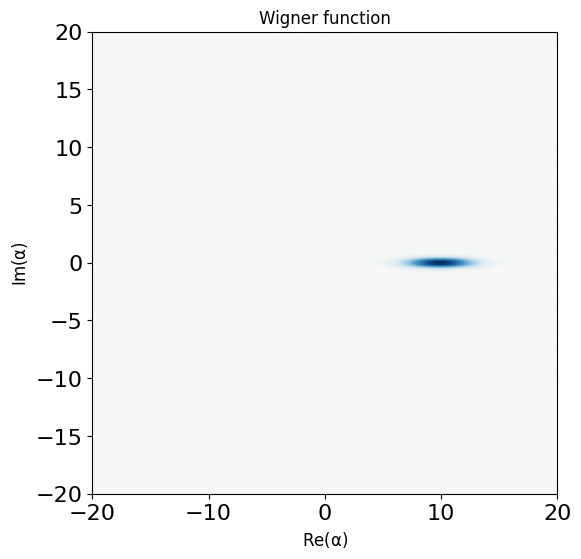

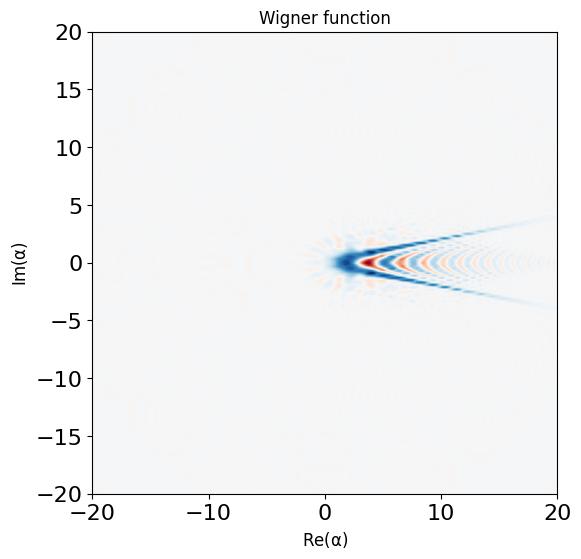

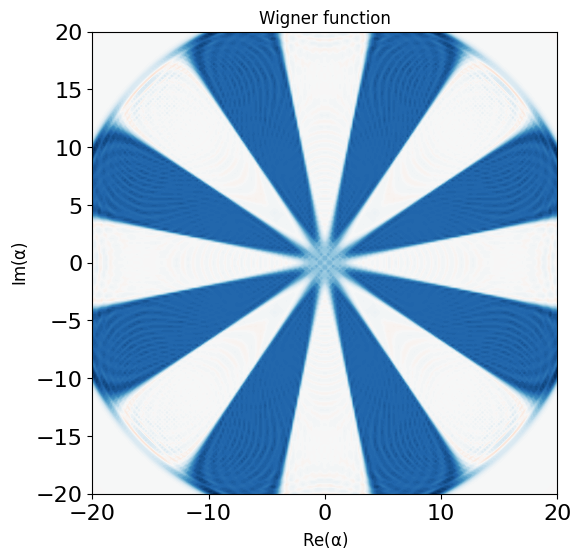

In [122]:
# plot_wigner(coherent(N,10), alpha_max=14)
plot_wigner(state, alpha_max=20)
plot_wigner(proObj._create_phase_parity_measurement(1) * state, alpha_max=20)
plot_wigner(proObj._create_phase_parity_measurement(1), alpha_max=20)

### opening results from last time if needed:

In [6]:
with open("results/2024-03-31,simResm_c=8,alpha=7,N=200.pkl", 'rb') as file:
    contsimres = dill.load(file)
fid_prob_list = contsimres.fid_prob_list

fid_list_con8 = [tup[0] for tup in fid_prob_list]
prob_list_con8 = [tup[1] for tup in fid_prob_list]

with open("results/2024-03-31,simResm_c=8,alpha=7,squeezed=-0.8,N=200.pkl", 'rb') as file:
    contsimres = dill.load(file)
fid_prob_list = contsimres.fid_prob_list

fid_list_con8_sq = [tup[0] for tup in fid_prob_list]

C:\Program Files\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


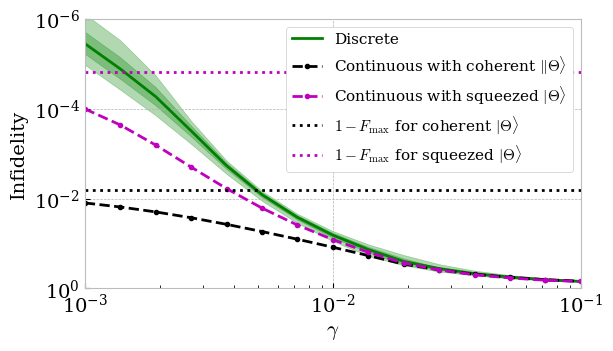

In [98]:
plt.figure(dpi=100, figsize = (6.4,3.5))

mpl.rcParams['text.usetex'] = False

# Correctly setting the LaTeX preamble
# This tells Matplotlib to use LaTeX and include the amsmath package.
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
mpl.rcParams['font.family'] = 'DejaVu Serif'
plt.style.use('bmh')
mpl.rcParams["axes.facecolor"] = "w"

plt.rcParams['font.size'] = 14
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14) 

# plt.loglog(gamma_list,1-np.array(fid_list164), 'b.-', label="$m_c=4$ discrete")
plt.loglog(gamma_list,1-np.array(fid_list168), 'g-', label="Discrete")
# plt.loglog(gamma_list,1-np.array(fid_list168_minus), 'g:')
# plt.loglog(gamma_list,1-np.array(fid_list168_plus), 'g:')
# plt.loglog(gamma_list,1-np.array(fid_list_con4), 'c.--', label="$m_c=4$ continuous")
plt.loglog(gamma_list,1-np.array(fid_list_con8), 'k.--', label="Continuous with coherent $\|\\Theta\\rangle$")
# plt.loglog(gamma_list,1-np.array(fid_list_con8), 'k.--', label="Continuous with coherent $|\\Theta\\rangle$")
plt.loglog(gamma_list,1-np.array(fid_list_con8_sq), 'm.--', label="Continuous with squeezed $|\\Theta\\rangle$")
# plt.loglog(gamma_list,1-np.array(fid_list_con8_sq_cut), 'r.--', label="d=32 squeezed")

plt.fill_between(gamma_list, 1 - np.array(fid_list168_minus), 1 - np.array(fid_list168_plus), color='g', alpha=0.3)
plt.fill_between(gamma_list, 1 - np.array(fid_list168_minus_sq), 1 - np.array(fid_list168_plus_sq), color='g', alpha=0.3)

plt.axhline(limit, color = 'k', linestyle = ':', label="$1-F_{\\mathrm{max}}$ for coherent $|\\Theta\\rangle$")
plt.axhline(limit_sq, color = 'm', linestyle = ':', label="$1-F_{\\mathrm{max}}$ for squeezed $|\\Theta\\rangle$")

# plt.title("Infidelity with trivial protocol and with our protocol. d = 16, m_i = 4, m_c=4")
plt.xlabel(f"$\\gamma$", fontsize=15)  # decay and 1/{gamma_ratio} 
plt.ylabel("Infidelity", fontsize=14)
plt.ylim([1,1e-6])
# plt.xlim([1e-2,1e-1])
plt.legend(prop={'size': 11}, framealpha=1)
# plt.title(f"${d=},{m_i=}, \\alpha={alpha} $")
# plt.gca().invert_yaxis()
plt.grid(linestyle = '--', linewidth = 0.5)
plt.xlim([1e-3,1e-1])

plt.savefig('plots/continuous_vs_discrete_alpha=7.svg', bbox_inches='tight')
plt.savefig('plots/continuous_vs_discrete_alpha=7.pdf', bbox_inches='tight')
plt.show()

In [ ]:
import dill

with open('fid_list_con4.pkl', 'wb') as file:
    dill.dump(fid_list_con4, file)

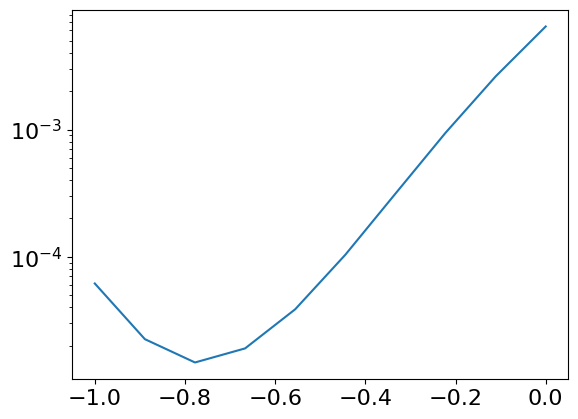

In [142]:
m_c = 8
n = 9
# N = 2**n
N = 150
alpha = 7
res = []
squeezed_list = np.linspace(0,-1,10)
for squeezed in squeezed_list:
    proObj = ContinuousProtocol(coherent(N,alpha),res=16,m_i=m_i, m_c=8)
    state = displace(N,alpha) * squeeze(N, squeezed) * coherent(N,0)
    limit_sq = (state.dag() * proObj._create_phase_parity_measurement(1) * state).full()[0][0]
    res.append(limit_sq)
plt.plot(squeezed_list,res)
plt.yscale('log')

49.788732235090045
15.669085812295942


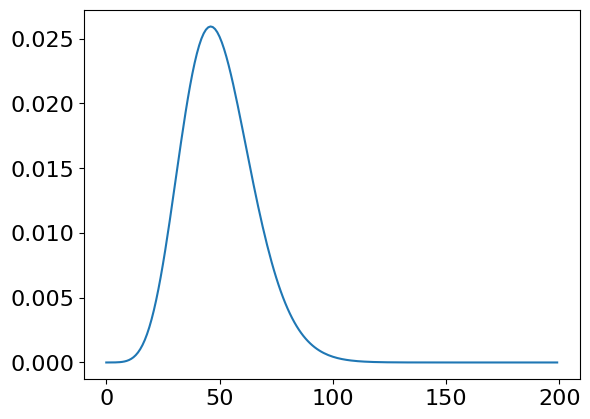

In [65]:
state = coherent(N,alpha)
state = displace(N,alpha) * squeeze(N, squeezed) * coherent(N,0)
fock_dist = np.abs(np.array(state))**2
mean_calculated = np.sum(np.arange(len(fock_dist)) * fock_dist.transpose())
std_calculated = np.sqrt(np.sum(fock_dist.transpose() * (np.arange(len(fock_dist)) - mean_calculated)**2))
print(mean_calculated)
print(std_calculated)


plt.plot(fock_dist)

In [29]:
np.mean([0,30])

15.0

In [54]:
(np.arange(len(fock_dist)) * fock_dist.transpose()).shape

(1, 200)

In [55]:
fock_dist

array([[5.24197290e-22],
       [2.56902510e-20],
       [6.29407548e-19],
       [1.02803369e-17],
       [1.25934130e-16],
       [1.23415451e-15],
       [1.00789286e-14],
       [7.05525003e-14],
       [4.32134066e-13],
       [2.35272991e-12],
       [1.15283766e-11],
       [5.13536774e-11],
       [2.09694183e-10],
       [7.90385766e-10],
       [2.76635018e-09],
       [9.03674393e-09],
       [2.76750283e-08],
       [7.97691992e-08],
       [2.17149487e-07],
       [5.60017097e-07],
       [1.37204189e-06],
       [3.20143107e-06],
       [7.13046011e-06],
       [1.51909802e-05],
       [3.10149180e-05],
       [6.07892393e-05],
       [1.14564336e-04],
       [2.07913053e-04],
       [3.63847843e-04],
       [6.14777391e-04],
       [1.00413640e-03],
       [1.58718335e-03],
       [2.43037450e-03],
       [3.60873790e-03],
       [5.20082815e-03],
       [7.28115941e-03],
       [9.91046697e-03],
       [1.31246725e-02],
       [1.69239198e-02],
       [2.12633864e-02],
